<a href="https://colab.research.google.com/github/piyushagni5/M.Tech_project_file/blob/master/project_file_mfcc_conventional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!pip freeze


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=362c020a92fc70639e01afaa178469dc668969b40208fbd72f9eaebafadc3d28
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
#import pyaudio
import wave
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import random

from scipy.io.wavfile import read
import scipy

from random import random
import math
from numpy.linalg import inv
from scipy.linalg import toeplitz

import wave, os, glob

from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator as pchip

import librosa

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

#from pycm import *
from sklearn.svm import SVC

import time

from termcolor import colored

In [0]:
from python_speech_features import mfcc
from python_speech_features import logfbank
from python_speech_features.sigproc import preemphasis
from python_speech_features.base import delta
from python_speech_features.base import fbank
from python_speech_features.sigproc import framesig


In [0]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np

In [0]:
#import pandas as pd
import pandas.util.testing as pd
import seaborn as sns

In [0]:
# Import GridsearchCV from Scikit Learn

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### EMODB DATASET DESCRIPTION

1. 6 basics emotions- W-anger, L-boredom, E-disgust, A-anxiety, F-happiness, T-sadness, N-neutral

2. 5F, 5M (10 utterences, 5 short & 5 longer)

3. filename = 03a01Fa.wav --> 03-a01-F-a.wav
              03--> speaker detail(M,31 year old) others are [08,09,10,11,12,13,14,15,16]
              a01--> code for text
              F--> emotion code
              a--> if there are more than 2 versions (there are no. a,b,c...)

### Pre-emphasis of the speech signal
alpha = 0.94

X_pre_emp = X_data

for i in range(len(X_data)):
    
    for j in range(1,len(X_data[i])):
        
        X_pre_emp[i][j]=X_data[i][j]-0.94*X_data[i][j-1]


In [0]:
## SPLITTING TRAINING & TESTING DATASET 

fs=8000

X_data = []
Y_data = []
path = '/content/drive/My Drive/MTP Project code /emodb/wav'

for filename in glob.glob(os.path.join(path, '*.wav')):
    
    data, sampling_rate = librosa.load(filename,sr=None)
    X_data.append(data)
    
    if (filename[22]=='W'):
        Y_data.append(0)                 # W-->0--> Anger
    elif(filename[22]=='L'):
        Y_data.append(1)                 # L-->1--> Boredom
    elif(filename[22]=='E'):
        Y_data.append(2)                 # E-->2--> Disgust
    elif(filename[22]=='A'):
        Y_data.append(3)                 # A-->3--> Anxiety/fear
    elif(filename[22]=='F'):
        Y_data.append(4)                 # F-->4--> Happiness
    elif(filename[22]=='T'):
        Y_data.append(5)                 # T-->5-->sadness
    else:                                   
        Y_data.append(6)                 # N-->6--> Neutral
        

#### python_speech_features.base.mfcc(signal, samplerate=16000, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=512, lowfreq=0, highfreq=None, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=<function <lambda>>)
1. signal – the audio signal from which to compute features. Should be an N*1 array
2. samplerate – the samplerate of the signal we are working with.
3. winlen – the length of the analysis window in seconds. Default is 0.025s (25 milliseconds)
4. winstep – the step between successive windows in seconds. Default is 0.01s (10 milliseconds)
5. numcep – the number of cepstrum to return, default 13
6. nfilt – the number of filters in the filterbank, default 26.
7. nfft – the FFT size. Default is 512.
8. lowfreq – lowest band edge of mel filters. In Hz, default is 0.
9. highfreq – highest band edge of mel filters. In Hz, default is samplerate/2
10. preemph – apply preemphasis filter with preemph as coefficient. 0 is no filter. Default is 0.97.
11. ceplifter – apply a lifter to final cepstral coefficients. 0 is no lifter. Default is 22.
12. appendEnergy – if this is true, the zeroth cepstral coefficient is replaced with the log of the total frame energy.
13. winfunc – the analysis window to apply to each frame. By default no window is applied. You can use numpy window functions here e.g. winfunc=numpy.hamming

#### inbuilt pre-emphasis function

In [0]:
X_pre_emphasis = []

for i in range(len(X_data)):
    X_pre_emphasis.append(preemphasis(X_data[i], coeff=0.94))

In [0]:
def feature_vector(X_data):    
    N_data=len(X_data)
    fs=8000   
    feat_size = 42

    feature_vect = np.zeros((N_data, feat_size))

    mfcc_coeff = np.zeros((N_data, 13))
    delta_coeff = np.zeros((N_data, 13))
    delta_delta_coeff = np.zeros((N_data, 13))
    frame_energy = np.zeros((N_data,3))

    ## using a 30-ms Hamming window with 7.5-ms step.
    for i in range (len(X_data)):

        mfcc_feat = mfcc( X_data[i], samplerate = 8000, winlen=0.03, winstep=0.0075, winfunc=np.hamming) 
        delta_feat = delta(mfcc_feat, N = mfcc_feat.shape[0])
        delta_delta_feat = delta(delta_feat, N = mfcc_feat.shape[0])
        #fbank_feat = logfbank(sig,rate)

        mfcc_coeff[i,:] = np.mean(mfcc_feat, axis = 0 )
        delta_coeff[i,:] = np.mean(delta_feat, axis = 0)
        delta_delta_coeff[i,:] = np.mean(delta_delta_feat, axis = 0)

        ## calculating frame energies, frames_size = no. of frames * frame_len

        frame_len = 0.03*fs
        frames = framesig(X_data[i], frame_len, frame_step= 0.0075*frame_len, winfunc=np.hamming)
        energy = np.zeros(len(frames))
        
        for fr in range(len(frames)):
            energy[fr] = np.dot(frames[fr],frames[fr])
            

        max_frame = max(energy)
        min_frame = min(energy)
        avg_frame = np.mean(energy)

        frame_energy[i,:] = [avg_frame, min_frame, max_frame]

        feature_vect[i,:] = np.hstack((mfcc_coeff[i,:], delta_coeff[i,:], delta_delta_coeff[i,:],
                                     frame_energy[i,:]))
        
    return feature_vect, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy


### <font color='cyan'>Part-1 Evaluation of noisy speech signal in all SNR values</font> 

In [0]:
def AWGN_new(X,snr):
    N = len(X)
    y_noisy = []
    for i in range(N): 
        x=X[i]
        sig_power = np.mean(np.abs(x.tolist())**2)
        sig_db = 10 * np.log10(sig_power)
        noise_db = sig_db -snr
        noise_power = 10 ** (noise_db / 10)
        # Generate an sample of white noise
        mean_noise = 0
        noise = np.random.normal(mean_noise, np.sqrt(noise_power), len(x))
        # Noise up the original signal
        y_noisy.append(x + noise)
    return y_noisy

In [0]:
tt1 = time.perf_counter()

SNR_dB = [0,10,20,30,'clean']
SNR_dB_scores = np.zeros((len(SNR_dB), 2))

count = 0

for snr in SNR_dB:
    print(colored("The observation is made for {} SNR_dB".format (snr), 'red', 'on_grey'), "\n")

    if snr!= 'clean':
        X_data_noisy = AWGN_new(X_data, snr)
    else:
        X_data_noisy = X_data
    
    feature_vect_noisy, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy = feature_vector(X_data_noisy)

    scaler = MinMaxScaler(feature_range=(-1, 1))
    X_noisy = scaler.fit_transform(feature_vect_noisy)
    y_noisy = np.asarray(Y_data)

    ## test train split
    X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy,y_noisy,test_size=0.2,random_state=27)
    grid_1 = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 5)
    grid_1.fit(X_train_noisy,y_train_noisy)

    print(grid_1.best_estimator_)       ## found the best estimator using grid search

    grid_1_predictions = grid_1.predict(X_test_noisy)
    print(confusion_matrix(y_test_noisy,grid_1_predictions))
    print(classification_report(y_test_noisy,grid_1_predictions))
    print(grid_1.score(X_test_noisy,y_test_noisy))

    shuffs_noisy = [True, False]
    scores_best_noisy = {"True":[], "False": []}

    for shuff_noisy in shuffs_noisy:
        print(colored("The observation is made when shuffle is {}".format (shuff_noisy), 'red', 'on_grey'), "\n")
        best_svc_noisy = grid_1.best_estimator_

        # k-fold cross validation
        cv_1 = KFold(n_splits=10, random_state=42, shuffle = shuff_noisy)

        for train_index, test_index in cv_1.split(X_noisy):
            #print("Train Index: ", train_index, "\n")
            #print("Test Index: ", test_index)

            X_train_1, X_test_1, y_train_1, y_test_1 = X_noisy[train_index], X_noisy[test_index], y_noisy[train_index], y_noisy[test_index]
            best_svc_noisy.fit(X_train_1, y_train_1)

            if(shuff_noisy == True):
                scores_best_noisy["True"].append(best_svc_noisy.score(X_test_1, y_test_1))
            else:
                scores_best_noisy["False"].append(best_svc_noisy.score(X_test_1, y_test_1))

            print("\n ")

    SNR_dB_scores[count,0] =np.mean(scores_best_noisy["True"])
    SNR_dB_scores[count,1] = np.mean(scores_best_noisy["False"]) 
    count += 1

tt2 = time.perf_counter()
print(f'Finished in {(tt2-tt1)/60} minutes')

The observation is made for 0 SNR_dB 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ...............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .

[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .

[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C

[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   10.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



 

 

 

 

 

 

 

 

 
The observation is made when shuffle is False 


 

 

 

 

 

 

 

 

 

 
The observation is made for 10 SNR_dB 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .

[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .

[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    9.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



 

 

 

 

 

 
The observation is made when shuffle is False 


 

 

 

 

 

 

 

 

 

 
The observation is made for 20 SNR_dB 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C

[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    9.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



 

 

 

 

 

 

 

 

 

 
The observation is made when shuffle is False 


 

 

 

 

 

 

 

 

 

 
The observation is made for 30 SNR_dB 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .

[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .

[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .

[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C

[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
SVC(C=

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    9.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[[24  0  0  2  0  0  0]
 [ 1  8  0  0  0  1  1]
 [ 0  1  5  0  1  0  0]
 [ 0  0  1 10  0  0  1]
 [ 3  0  0  2 12  0  0]
 [ 0  4  0  0  0  9  1]
 [ 0  6  0  0  0  0 14]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.42      0.73      0.53        11
           2       0.83      0.71      0.77         7
           3       0.71      0.83      0.77        12
           4       0.92      0.71      0.80        17
           5       0.90      0.64      0.75        14
           6       0.82      0.70      0.76        20

    accuracy                           0.77       107
   macro avg       0.78      0.75      0.75       107
weighted avg       0.80      0.77      0.77       107

0.7663551401869159
The observation is made when shuffle is True 


 

 

 

 

 

 

 

 

 

 
The observation is made when shuffle is False 


 

 

 

 

 

 

 

 

 

 
The observation is made for clean SNR_dB 

Fitting 5 folds f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .

[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C

[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .

[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    8.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



 

 

 

 

 

 

 

 

 

 
The observation is made when shuffle is False 


 

 

 

 

 

 

 

 

 

 
Finished in 27.127908118333348 minutes


In [0]:
SNR_dB_scores

array([[0.54566737, 0.54245283],
       [0.60555556, 0.56457023],
       [0.65992313, 0.62078966],
       [0.70269043, 0.64168414],
       [0.73291405, 0.63228512]])

### <font color='cyan'>Part-2 Evaluation of noisy pre_emphasis speech signal in all SNR values</font> 

In [0]:
t1 = time.perf_counter()

SNR_dB_pre = [0,10,20,30,'clean']
SNR_dB_scores_pre = np.zeros((len(SNR_dB), 2))

count_pre = 0

for snr_pre in SNR_dB_pre:
    print(colored("The observation is made for {} SNR_dB".format (snr_pre), 'red', 'on_grey'), "\n")

    if snr_pre!= 'clean':
        X_data_noisy = AWGN_new(X_pre_emphasis, snr_pre)
    else:
        X_data_noisy = X_pre_emphasis
    feature_pre_emp, mfcc_coeff_pre_emp, delta_coeff_pre_emp, delta_delta_coeff_pre_emp, frame_energy_pre_emp = feature_vector(X_data_noisy)
    
    X_pre_emp = scaler.fit_transform(feature_pre_emp)
    y_pre_emp = np.asarray(Y_data)

    X_train_pre_emp, X_test_pre_emp, y_train_pre_emp, y_test_pre_emp = train_test_split(X_pre_emp,y_pre_emp,test_size=0.2,random_state=27)
    
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}
    grid_pre_emp = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 10)
    grid_pre_emp.fit(X_train_pre_emp,y_train_pre_emp)

    print(colored("The Hyper-parameter tuning for pre-emphasis speech signal", 'green', 'on_yellow'))
    print(grid_pre_emp.best_estimator_)

    grid_predictions_pre_emp = grid_pre_emp.predict(X_test_pre_emp)
    print(confusion_matrix(y_test_pre_emp, grid_predictions_pre_emp))
    print(classification_report(y_test_pre_emp, grid_predictions_pre_emp))
    print(grid_pre_emp.score(X_test_pre_emp,y_test_pre_emp))

    scores_best_pre_emp = {"True":[], "False": []}
    shuffs_pre_emp = [True, False]

    for shuff_pre_emp in shuffs_pre_emp:
        print(colored("The observation is made pre-emphasis when shuffle is {}".format (shuff), 'red', 'on_grey'), "\n")

        best_svc_pre_emp = grid_pre_emp.best_estimator_

        # k-fold cross validation

        cv_pre_emp = KFold(n_splits=10, random_state=42, shuffle = shuff_pre_emp)
        for train_index, test_index in cv_pre_emp.split(X):

            #print("Train Index: ", train_index, "\n")
            #print("Test Index: ", test_index)

            X_train_pre_emp, X_test_pre_emp, y_train_pre_emp, y_test_pre_emp = X_pre_emp[train_index], X_pre_emp[test_index], y_pre_emp[train_index], y_pre_emp[test_index]

            best_svc_pre_emp.fit(X_train_pre_emp, y_train_pre_emp)
            if(shuff_pre_emp == True):
                scores_best_pre_emp["True"].append(best_svc_pre_emp.score(X_test_pre_emp, y_test_pre_emp))
            else:
                scores_best_pre_emp["False"].append(best_svc_pre_emp.score(X_test_pre_emp, y_test_pre_emp))

            print("\n ")

    SNR_dB_scores_pre[count_pre,0] = np.mean(scores_best_pre_emp["True"])
    SNR_dB_scores_pre[count_pre,1] = np.mean(scores_best_pre_emp["False"]) 
    count_pre += 1

t2 = time.perf_counter()
print(f'Finished in {(t2-t1)/60} minutes')

The observation is made for 0 SNR_dB 

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C

[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C

[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] .

[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .

[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   25.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



The observation is made pre-emphasis when shuffle is False 


 

 

 

 

 

 

 

 

 

 
The observation is made pre-emphasis when shuffle is False 


 

 

 

 

 

 

 

 

 

 
The observation is made for 10 SNR_dB 

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C

[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .

[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   22.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The Hyper-parameter tuning for pre-emphasis speech signal
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[23  0  0  1  2  0  0]
 [ 0  7  0  0  0  1  3]
 [ 1  0  4  1  1  0  0]
 [ 0  0  0 11  0  0  1]
 [ 5  0  1  2  9  0  0]
 [ 0  3  0  1  0  9  1]
 [ 0  9  0  1  1  0  9]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       0.37      0.64      0.47        11
           2       0.80      0.57      0.67         7
           3       0.65      0.92      0.76        12
           4       0.69      0.53      0.60        17
           5       0.90      0.64      0.75        14
           6       0.64      0.45      0.53        20

    accuracy                           0.67       107
   macro avg       0.69      0.66      0.66       107
weig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C

[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C

[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .

[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   21.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[[23  0  1  0  1  0  1]
 [ 0  9  0  1  0  0  1]
 [ 0  0  5  0  1  1  0]
 [ 1  1  0 10  0  0  0]
 [ 3  0  0  5  9  0  0]
 [ 0  0  0  2  0 11  1]
 [ 0  6  0  0  0  0 14]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.56      0.82      0.67        11
           2       0.83      0.71      0.77         7
           3       0.56      0.83      0.67        12
           4       0.82      0.53      0.64        17
           5       0.92      0.79      0.85        14
           6       0.82      0.70      0.76        20

    accuracy                           0.76       107
   macro avg       0.77      0.75      0.75       107
weighted avg       0.79      0.76      0.76       107

0.7570093457943925
The observation is made pre-emphasis when shuffle is False 


 

 

 

 

 

 

 

 

 

 
The observation is made pre-emphasis when shuffle is False 


 

 

 

 

 

 

 

 

 

 
The observation is made for 30 SN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] .

[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .

[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   20.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The Hyper-parameter tuning for pre-emphasis speech signal
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[24  0  0  1  0  0  1]
 [ 0  8  0  0  0  1  2]
 [ 1  0  5  0  0  1  0]
 [ 1  2  0  8  1  0  0]
 [ 3  0  0  4 10  0  0]
 [ 0  3  0  1  0 10  0]
 [ 0  7  0  0  0  0 13]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       0.40      0.73      0.52        11
           2       1.00      0.71      0.83         7
           3       0.57      0.67      0.62        12
           4       0.91      0.59      0.71        17
           5       0.83      0.71      0.77        14
           6       0.81      0.65      0.72        20

    accuracy                           0.73       107
   macro avg       0.76      0.71      0.72       107
weig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] .

[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .

[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   20.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



 

 

 

 

 

 

 
The observation is made pre-emphasis when shuffle is False 


 

 

 

 

 

 

 

 

 

 
Finished in 27.120416528333347 minutes


In [0]:
SNR_dB_scores_pre

array([[0.57966457, 0.52907058],
       [0.65964361, 0.60761705],
       [0.70838574, 0.63008386],
       [0.74021663, 0.67526205],
       [0.75527603, 0.63242488]])

### <font color='cyan'> DATA ANALYSIS : PLOTTING SECTION </font>

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(feature_vect)
y = np.asarray(Y_data)

X_pre_emp = scaler.fit_transform(feature_pre_emp)
y_pre_emp = np.asarray(Y_data)

In [0]:
feature_vect_noisy, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy = feature_vector(X)

feature_pre_emp, mfcc_coeff_pre_emp, delta_coeff_pre_emp, delta_delta_coeff_pre_emp, frame_energy_pre_emp = feature_vector(X_pre_emp)


In [0]:
X.shape

(535, 42)

In [0]:
mfcc_coeff.shape

(535, 13)

mfcc_coeff = scaler.fit_transform(mfcc_coeff)
delta_coeff = scaler.fit_transform(delta_coeff)
delta_delta_coeff = scaler.fit_transform(delta_delta_coeff)
frame_energy = scaler.fit_transform(frame_energy)

In [0]:
df = pd.DataFrame({'Column1': mfcc_coeff[:, 0], 'Column2': mfcc_coeff[:, 1], 'Column3': mfcc_coeff[:, 2], 'Column4': mfcc_coeff[:, 3],
                   'Column5': mfcc_coeff[:, 4], 'Column6': mfcc_coeff[:, 5], 'Column7': mfcc_coeff[:, 6],'Column8': mfcc_coeff[:, 7],
                   'Column9': mfcc_coeff[:, 8], 'Column10': mfcc_coeff[:, 9], 'Column11': mfcc_coeff[:, 10],'Column12': mfcc_coeff[:, 11],
                   'Column13': mfcc_coeff[:, 12],
                   'avg_energy': frame_energy[:,0], 'min_energy': frame_energy[:,1], 'max_energy': frame_energy[:,2],'emotion': y})

In [0]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,avg_energy,min_energy,max_energy,emotion
0,-6.028057,-7.702607,-4.464476,6.081996,-2.737647,5.575006,-11.895988,-3.943580,-13.076291,2.191200,-4.005048,2.883469,-4.840660,0.640175,0.000025,11.241804,4
1,-6.088528,1.190361,-7.535629,5.946219,-1.729085,0.423730,-4.705173,-4.015383,-15.794829,4.474009,-4.710901,12.249070,3.461104,1.688037,0.000062,13.859101,6
2,-5.016810,-9.247636,-15.861034,1.014416,-7.307912,-0.151713,-6.858078,-6.088147,-14.490653,-2.455070,-6.842131,2.177841,-4.391050,1.620148,0.000012,19.584328,0
3,-5.340327,-10.158491,-4.055053,0.999327,-3.668900,-0.346107,-9.300027,-6.883731,-12.874019,-7.500543,-15.487272,-2.161657,-6.396766,1.472192,0.000020,20.896739,4
4,-5.275081,-0.315954,-4.021673,11.752014,3.019906,2.567480,-3.847552,-3.511686,-14.909066,0.645498,-5.654828,5.447731,3.491371,2.854539,0.000067,19.499779,6


In [0]:
df.iloc[:,[0,1,13,14,15,16]].head()              # row 1 is exclusive

,Column1,Column2,avg_energy,min_energy,max_energy,emotion
0,-6.028057,-7.702607,0.640175,0.000025,11.241804,4
1,-6.088528,1.190361,1.688037,0.000062,13.859101,6
2,-5.016810,-9.247636,1.620148,0.000012,19.584328,0
3,-5.340327,-10.158491,1.472192,0.000020,20.896739,4
4,-5.275081,-0.315954,2.854539,0.000067,19.499779,6


In [0]:
df.emotion.head()

0    4
1    6
2    0
3    4
4    6
Name: emotion, dtype: int32

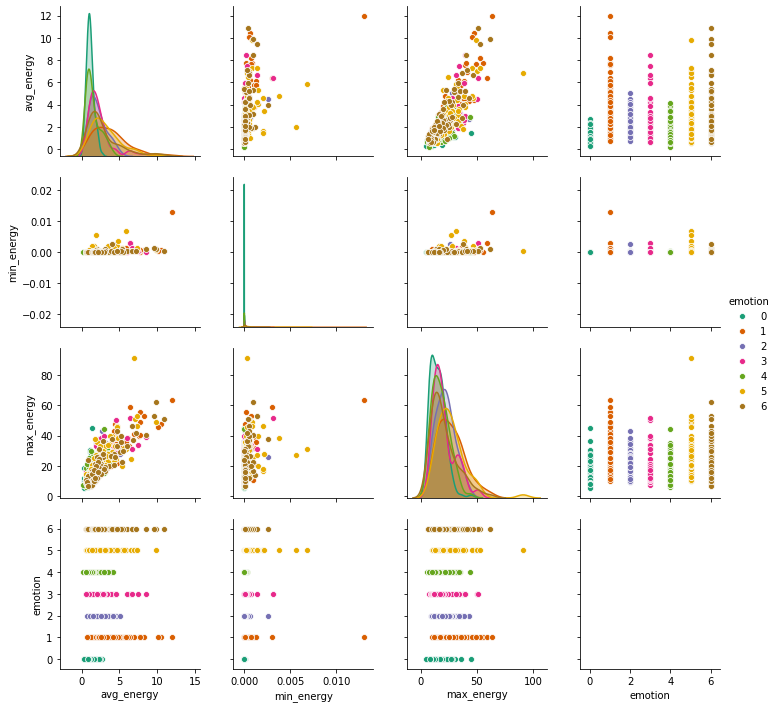

In [0]:
sns.pairplot(df.iloc[:,[13,14,15,16]], hue = 'emotion', palette = 'Dark2')

In [0]:
k=df.iloc[:,[0,1,16]]
k=k[(k.emotion == 0) | (k.emotion == 4)]

k.head()

,Column1,Column2,emotion
0,-6.028057,-7.702607,4
2,-5.016810,-9.247636,0
3,-5.340327,-10.158491,4
6,-4.777394,-13.968354,0
7,-5.582445,-8.527829,0


In [0]:
 
X_analyse = k.iloc[:,[0,1]].to_numpy()
y_analyse = k.emotion.to_numpy()

In [0]:
X_analyse.shape

(198, 2)

In [0]:
y_analyse.shape

(198,)

In [0]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X_analyse,y_analyse,test_size=0.2,random_state=27)

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

grid_analyse = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 5)
grid_analyse.fit(Xx_train,yy_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   6.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   4.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   2.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   2.9s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   6.5s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] ........................ C=1, gamma=1, kernel=poly, total=  13.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   7.5s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   5.4s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=  25.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=  13.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] ....................... C=10, gamma=1, kernel=poly, total=  15.6s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=  19.2s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=  20.8s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total= 1.2min
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=  16.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .

[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] .

[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.4s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  7.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
print(grid_analyse.best_estimator_)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Employing the best parameter estimator

#### W-->0--> Anger
#### L-->1--> Boredom
#### E-->2--> Disgust
#### A-->3--> Anxiety/fear
#### F-->4--> Happiness
#### T-->5-->sadness
#### N-->6--> Neutral

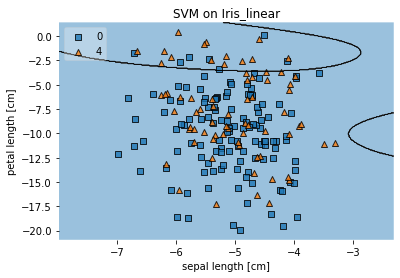

In [0]:
from mlxtend.plotting import plot_decision_regions

# Training a classifier
svm_analyse = grid_analyse.best_estimator_     # C (Regularisation)
svm_analyse.fit(X_analyse, y_analyse)

# Plotting decision regions
#plt.figure(figsize=(10,10))
plot_decision_regions(X_analyse, y_analyse, clf=svm_analyse, legend=2)

# Adding axes annotations


plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris_linear')
plt.show()